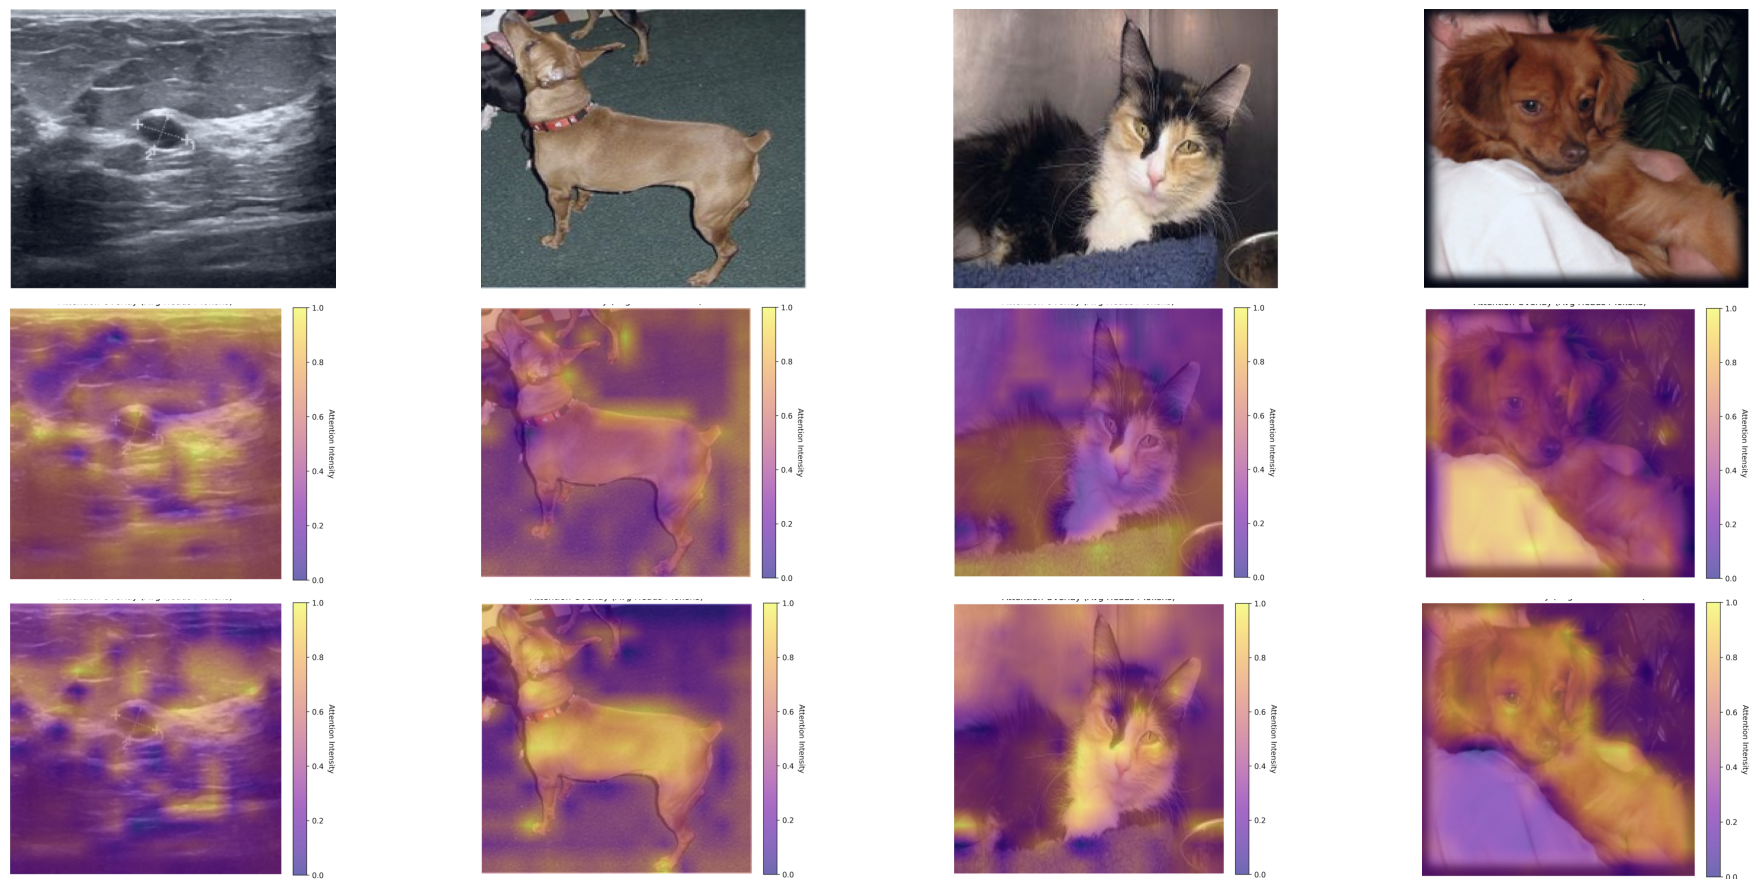

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your folders
original_path = '/mnt/storage/aonsafdar/Latest/attention_maps_comparison/original'
vit_path = '/mnt/storage/aonsafdar/Latest/attention_maps_comparison/Vit_tiny'
cavit_path = '/mnt/storage/aonsafdar/Latest/attention_maps_comparison/CAVit_tiny'
# --- Load filenames and split ---
filenames = sorted([f for f in os.listdir(original_path) if f.endswith(('.png', '.jpg'))])
assert len(filenames) >= 8, "At least 8 images are needed!"

group1 = filenames[:4]   # Left panel
group2 = filenames[4:8]  # Right panel

# --- Reference attention map size ---
sample_size = Image.open(os.path.join(vit_path, filenames[0])).size

# --- Prepare canvas: 4 rows × 6 columns ---
fig, axs = plt.subplots(4, 6, figsize=(18, 12))

# --- Plot Group 1: columns 0,1,2 ---
for i, fname in enumerate(group1):
    orig = Image.open(os.path.join(original_path, fname)).resize(sample_size)
    vit = Image.open(os.path.join(vit_path, fname))
    cavit = Image.open(os.path.join(cavit_path, fname))

    axs[i, 0].imshow(orig)
    axs[i, 1].imshow(vit)
    axs[i, 2].imshow(cavit)

    axs[i, 0].axis('off')
    axs[i, 1].axis('off')
    axs[i, 2].axis('off')

# --- Plot Group 2: columns 3,4,5 ---
for i, fname in enumerate(group2):
    orig = Image.open(os.path.join(original_path, fname)).resize(sample_size)
    vit = Image.open(os.path.join(vit_path, fname))
    cavit = Image.open(os.path.join(cavit_path, fname))

    axs[i, 3].imshow(orig)
    axs[i, 4].imshow(vit)
    axs[i, 5].imshow(cavit)

    axs[i, 3].axis('off')
    axs[i, 4].axis('off')
    axs[i, 5].axis('off')

# --- Optional: Add top row column titles ---
titles = ["Original", "ViT-Tiny", "CA-ViT-Tiny", "Original", "ViT-Tiny", "CA-ViT-Tiny"]
for i in range(6):
    axs[0, i].set_title(titles[i], fontsize=14)

# --- Save & show ---
plt.tight_layout()
plt.savefig("final_side_by_side_grid.png", dpi=300)
plt.show()